In [45]:
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter = ';')

df1 = df.copy()

<Axes: xlabel='NAME'>

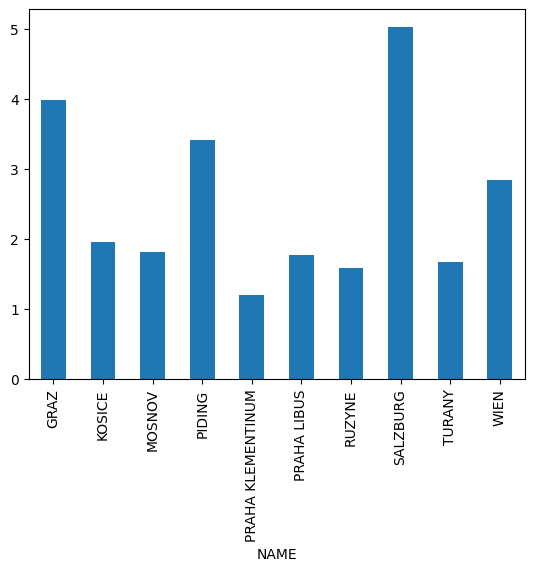

In [46]:
# # prvnich 5 radku dataframe
# print(df.head())
# # poslednich 5 radku
# print(df.tail())

# print(df.shape)
# # datove typy jednotlivych sloupcu
# print(df.dtypes)

# Vybirame vsechny radky a 3 sloupce z dataframe
df = df.loc[:,['NAME','DATE','PRCP']]
# Prumerne PRCP dle NAME ve sloupcovem grafu
# Agregace hodnot dle NAME, vysledkem je pandas.series, kdy name mame na indexu
df = df.groupby(by='NAME')['PRCP'].mean()

df.plot(kind='bar')


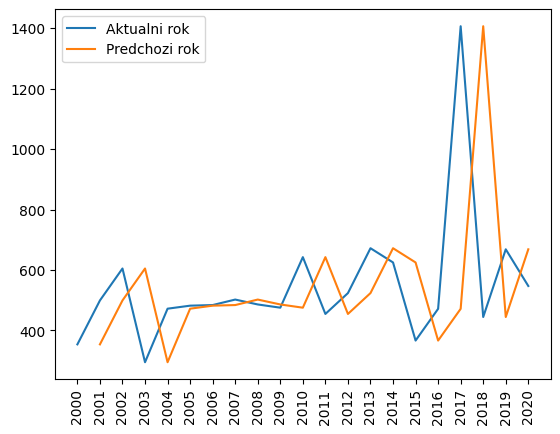

In [47]:
from matplotlib import pyplot as plt

# Omezit data na RUZYNE a sloupce DATE,PRCP

df1 = df1.loc[df1['NAME'] == 'RUZYNE',['DATE','PRCP']]

# Zmena DATE na datetime a dopocitani rok v jednom kroku

df1['ROK'] = pd.to_datetime(df1['DATE']).dt.year

# agregace dle ROK, suma PRCP

df1 = df1.groupby(by='ROK',as_index=False)['PRCP'].sum()

df1['PRCP PREDCHOZI'] = df1['PRCP'].shift(1)

fig,ax = plt.subplots(1,1)

ax.plot(df1['ROK'],df1['PRCP'],label='Aktualni rok')
ax.plot(df1['ROK'],df1['PRCP PREDCHOZI'],label='Predchozi rok')
plt.legend()

# Unikatni hodnoty ze sloupce rok
roky = df1['ROK'].unique().tolist()

plt.xticks(ticks=roky, rotation=90)


plt.show()
